# Рекомендация тарифов

В нашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Построим модель для задачи классификации, которая выберет подходящий тариф. 


**Цель исследования:**

Построим модель с максимально большим значением *accuracy*.

**Ход исследования:** 

Данные о поведении клиентов получим из файлов `users_behavior.csv`. О качестве данных известно, что предобработка данных не понадобится — мы её уже сделали. Проверим *accuracy* на тестовой выборке самостоятельно.

Таким образом, исследование пройдёт в шесть этапов:
 1. Откроем и изучим файл.
 2. Разобьём данные на выборки.
 3. Исследуем модели.
 4. Проверим модель на тестовой выборке.
 5. Проверим модели на адекватность.
 6. Общий вывод.

*Примечание:
Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75*


## Откроем и изучим файл

In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
df

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:

* `сalls` — количество звонков,
* `minutes` — суммарная длительность звонков в минутах,
* `messages` — количество sms-сообщений,
* `mb_used` — израсходованный интернет-трафик в Мб,
* `is_ultra` — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

In [5]:
df.is_ultra.value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122
minutes,0.982083,1.000000,0.173110,0.280967,0.206955
messages,0.177385,0.173110,1.000000,0.195721,0.203830
mb_used,0.286442,0.280967,0.195721,1.000000,0.198568
is_ultra,0.207122,0.206955,0.203830,0.198568,1.000000


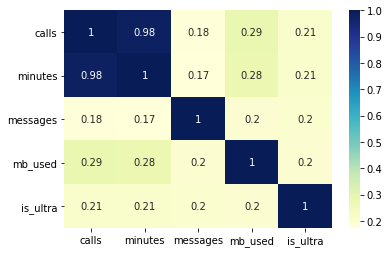

In [6]:
display(df.corr())
df_plot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)  


plt.show()

## Разобьём данные на выборки

Разделим исходные данные на обучающую, валидационную и тестовую выборки:

In [7]:
features = df.drop('is_ultra', axis=1)
target = df['is_ultra']

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.4, random_state=12345, stratify=target)

features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5, random_state=12345, stratify=target_valid)

## Исследуем качество разных моделей, меняя гиперпараметры. Кратко напишем выводы исследования:

Первой моделью будет `Дерево решений`.

In [8]:
best_model_tree = None
best_result_tree = 0
best_depth_tree = 0
for depth in range(1, 10):
    model_tree = DecisionTreeClassifier(random_state=7, max_depth=depth)
    model_tree.fit(features_train, target_train)
    predictions_tree = model_tree.predict(features_valid)
    result_tree = accuracy_score(target_valid, predictions_tree)
    if result_tree > best_result_tree:
        best_depth_tree = depth
        best_model_tree = model_tree
        best_result_tree = result_tree
        
print("Accuracy лучшей модели Дерева решений:", best_result_tree, ", глубина дерева: ", best_depth_tree)

Accuracy лучшей модели Дерева решений: 0.7962674961119751 , глубина дерева:  8


Вторая модель - `Случайный лес`.

In [9]:
%%time


best_model_forest = None
best_result_forest = 0
best_n_estimators = 0
best_depth = 0

for depth in range(2, 22, 2):
    for est in range(50, 351, 50):
        model_forest = RandomForestClassifier(random_state=7, n_estimators=est, max_depth=depth)
        model_forest.fit(features_train, target_train)
        result_forest = model_forest.score(features_valid, target_valid)
        if result_forest > best_result_forest:
            best_model_forest = model_forest
            best_result_forest = result_forest
            best_n_estimators = est
            best_depth = depth
         
            
print("Accuracy лучшей модели Случайного леса:", best_result_forest, ", количество деревьев: ", best_n_estimators, ", глубина: ", best_depth)

Accuracy лучшей модели Случайного леса: 0.8195956454121306 , количество деревьев:  50 , глубина:  8
CPU times: user 40.3 s, sys: 275 ms, total: 40.5 s
Wall time: 40.6 s


Третья модель - `Логическая регрессия`.

In [10]:
model_logistic = LogisticRegression(random_state=7, solver='lbfgs', max_iter=1000)
model_logistic.fit(features_train, target_train)
result_logistic = model_logistic.score(features_valid,target_valid)
print("Accuracy лучшей модели Логической регрессии:", result_logistic)

Accuracy лучшей модели Логической регрессии: 0.7387247278382582


**Вывод:** скорость работы каждой модели прямопропорциональна её точности. Самая быстрая и неточаная - `Логическая регрессия`, самая медленная и точная - `Случайный лес`. `Дерево решений` имеет высокую скорость и при этом относительно неплохую точность.

## Проверим модель на тестовой выборке

Проверьте качество модели на тестовой выборке:

Проверим лучшую модель `Случайный лес`.

In [11]:
%%time

model_forest = RandomForestClassifier(random_state=7, n_estimators=50, max_depth=8)
model_forest.fit(features_train, target_train)
result_forest = model_forest.score(features_test, target_test)       
            
print("Accuracy лучшей модели Случайного леса:", result_forest)

Accuracy лучшей модели Случайного леса: 0.8133748055987559
CPU times: user 149 ms, sys: 0 ns, total: 149 ms
Wall time: 156 ms


**Вывод:** на тестовой выборки точность модели немного упала, но близка к валидной. Можно сделать вывод, что модель работает стабильно.

## Проверим модели на адекватность

Поскольку точность моделей выше 0.5 - случайной вероятности, то можно судить о том, что модель адекватная и приносит результат.

Константная модель Случайного леса:

In [13]:
target_constant = pd.Series(0, index=target_train.index)


model_constant = RandomForestClassifier(random_state=7, n_estimators=50, max_depth=8)
model_constant.fit(features_train, target_constant)
result_constant = model_constant.score(features_test, target_test)       
            
print("Accuracy константной модели:", result_constant)
print("Accuracy нашей лучшей модели:", result_forest)

if result_forest > result_constant:
    print('Вывод: наша модель адекватна')
else:
    print('Вывод: наша модель неадекватна')

Accuracy константной модели: 0.6936236391912908
Accuracy нашей лучшей модели: 0.8133748055987559
Вывод: наша модель адекватна


## Общий вывод

Мы построили модель `Случайного леса` с наиболее оптимальными гиперпараметрами количества деревьев равное 50 и глубной равной 8, что позволило достичь максимально высого значениея accuracy - 0.813 среди всех трёх моделей. Данный результат превышает устанную планку поставленной задачи accuracy в 0.75, что говорит о выполнении поставленных задач.
Наша модель так же прошла проверку на адекватность.